In [ ]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error,r2_score


In [2]:
data=pd.read_csv("/Users/siddharthkumar2023/Downloads/student+performance/student/student-mat.csv",sep=';')

In [3]:
print(data.head)

<bound method NDFrame.head of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freet

In [ ]:
print(data.columns.tolist())


In [4]:
x=data[['studytime','failures','absences']]
y=data['G3']

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [7]:
y_pred=model.predict(x_test)

In [8]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"MSE is : {mse}, r2 score is :{r2} ")

MSE is : 19.874690744643697, r2 score is :0.030741529886840202 


In [ ]:

cv_scores = cross_val_score(model, x, y, cv=10, scoring='neg_mean_squared_error')
print(f'Cross-validated MSE: {-cv_scores.mean()}')



Cross-validated MSE: 18.68852843827886


In [10]:
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


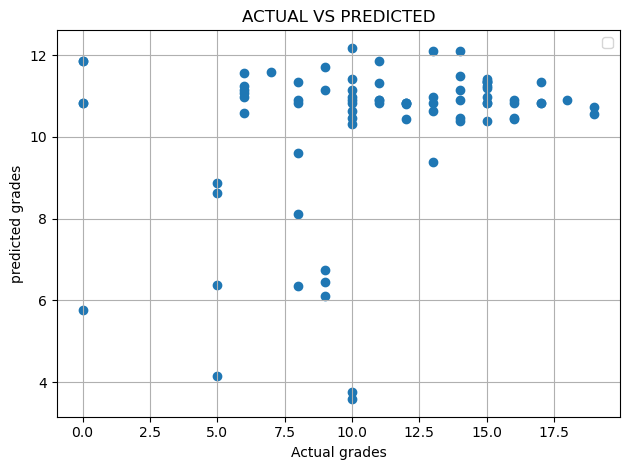

In [12]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual grades")
plt.ylabel("predicted grades")
plt.title("ACTUAL VS PREDICTED")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()